<img title="IMOS" alt="IMOS logo" src="IMOS_logo.png" width="600" align="left" />     
<br>
<br>
<br>

# <font color=#3498DB> TUTORIAL
<br>

  
## Loading and plotting ANFOG data using Python      

<br>    
Authors: Dr A. Schaeffer and Dr M. Hemming (NSW-IMOS)
<br>
--------------------------------------------------------------------------------------------------
<br>
    
### Introduction

Ocean gliders have been used by the Integrated Marine Observing System (IMOS) since 2008. They allow the collection of high-resolution information in space (depth, longitude, latitude) and in time. 

The Australian National Facility for Ocean Gliders (ANFOG) is responsible for the operation and maintenance of the ocean glider fleet, whilst the Australian Ocean Data Network (AODN) is responsible for making glider data available for anyone to download through the portal. 

This Notebook is a guide on how to access and plot the ocean glider data.


### In this tutorial, you will:
<br>

* Search and download glider data from the AODN

* Load ANFOG glider data using python 

* Look through ANFOG netCDF file data and attributes

* Produce plots

* Save modified data as a netCDF file

<br>
<br>

# <font color=#3498DB> Before Starting

------
<br>

### Install packages:

* xarray
* pandas
* matplotlib
* cmocean 
* cartopy
* netcdf4

<br>
<div style="background:#D1F2EB;padding:5px;">    
    <h4> "pip install <span style="color:blue">package</span>"</h4> 
<br>
                or 
<br>
<h4>"conda install -c conda-forge <span style="color:blue">package</span>"</h4>
    <br>
    Depending on whether you have installed python using Anaconda or not. 
    </div>

In [2]:
# conda install -c conda-forge pandas

^C

Note: you may need to restart the kernel to use updated packages.



# <font color=#3498DB> Search and download AODN data
______________    
    
<br>

ANFOG stands for Australian National Facility for Ocean Gliders.
    
You can download ANFOG netCDF files from the Australian Ocean Data Network (<a href="https://portal.aodn.org.au/">AODN website</a>).

<br>

    
<img title="IMOS" alt="IMOS logo" src="AODN_example.png" width="800"/>      
    
<br>
<br>
  
We will look at data from Heron Island in 2015 as an example.
    
When on the AODN portal navigate and select the Heron 2015 deployment for download:

<br>

<div style="background:#D1F2EB;padding:5px;">    
Platform -> glider 
<br>
Dataset -> IMOS - 'Australian National Facility for Ocean Gliders (ANFOG) - delayed mode glider deployments' 
<br>
Deployment -> 'Heron20150521' 
</div>

## After download:

filename: IMOS_-_Australian_National_Facility_for_Ocean_Gliders_(ANFOG)_-_delayed_mode_glider_deployments_source_files.zip
    
unzip -> IMOS_ANFOG_BCEOPSTUVN_20150521T004128Z_SL416_FV01_timeseries_END-20150530T131213Z.nc


# <font color=#3498DB> Load ANFOG data into python

Now we are going to load in the ANFOG Heron Island netCDF file we just downloaded from the AODN
<br>

To do this, and the other things we plan to do later, we need to load in some python packages:
<br>
<br>
<div style="background:#D1F2EB;padding:5px;">   
<h4><a href="http://xarray.pydata.org/en/stable/">xarray</a>: makes working with labelled multi-dimensional arrays simple, efficient, and fun!
<h4><a href="https://pandas.pydata.org/">pandas</a>: high-performance, easy-to-use data structures and data analysis tools for the Python programming language
<h4><a href="https://matplotlib.org/">matplotlib</a>: 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms

<h4><a href="https://matplotlib.org/cmocean/">cmocean</a>: perceptually uniform colormaps
<h4><a href="https://scitools.org.uk/cartopy/docs/latest/">cartopy</a>: designed for geospatial data processing in order to produce maps and other geospatial data analyses    
<h4><a href="https://unidata.github.io/netcdf4-python/netCDF4/index.html">netcdf4</a>: Python interface to the netCDF C library    
</div>
<br>
<br>


In [3]:
# for loading data and calculations
import xarray as xr
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import cmocean
# for creating glider map
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### (Ignore warning)

### Define name of file, load using xarray with one line of code

In [5]:
filename = 'IMOS_ANFOG_BCEOPSTUVN_20150521T004128Z_SL416_FV01_timeseries_END-20150530T131213Z.nc'
glider_data = xr.open_dataset(filename)
# convert from data set to data frame for easier plotting later
glider_data_frame = xr.Dataset.to_dataframe(glider_data)

# <font color=#3498DB> Look through netCDF file data and attributes

### what is 'glider_data'?

In [6]:
type(glider_data)

xarray.core.dataset.Dataset

xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. 

It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions.

It is designed as an in-memory representation of the data model from the netCDF file format.

### Take a look at variable names and global attributes

In [7]:
glider_data

<xarray.Dataset>
Dimensions:                    (TIME: 128646)
Coordinates:
    LATITUDE                   (TIME) float64 -23.42 -23.42 -23.42 ... nan nan
    LONGITUDE                  (TIME) float64 151.9 151.9 151.9 ... nan nan nan
  * TIME                       (TIME) datetime64[ns] 2015-05-21T00:41:28.8924...
    DEPTH                      (TIME) float64 0.1789 0.1391 0.2186 ... nan nan
Data variables: (12/44)
    PLATFORM                   |S1 b''
    DEPLOYMENT                 |S1 b''
    SENSOR1                    |S1 b''
    SENSOR2                    |S1 b''
    SENSOR3                    |S1 b''
    SENSOR4                    |S1 b''
    ...                         ...
    CDOM                       (TIME) float64 0.2336 -0.06793 ... 0.7811 nan
    CDOM_quality_control       (TIME) float32 1.0 4.0 1.0 1.0 ... 0.0 0.0 9.0
    VBSC                       (TIME) float64 0.0001902 0.0001924 ... nan
    VBSC_quality_control       (TIME) float32 1.0 1.0 1.0 1.0 ... 0.0 0.0 9.0
    NTRA                       (TIME) float64 6.12 6.433 6.753 ... 13.65 13.65
    NTRA_quality_control       (TIME) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/45)
    institution:                      ANFOG (Australian National Facility for...
    references:                       http://www.imos.org.au; "ANFOG Data Man...
    cdm_data_type:                    Trajectory
    data_centre_email:                info@emii.org.au
    principal_investigator:           Pattiaratchi, Charitha
    principal_investigator_email:     chari.pattiaratchi@uwa.edu.au
    ...                               ...
    geospatial_lat_min:               -23.422964
    geospatial_lon_max:               152.18773
    geospatial_lon_min:               151.8783
    compliance_checker_version:       1.1.1 (79b23fe87f7e932974b93f7bdc1de29d...
    compliance_checker_last_updated:  2016-01-21 01:31:49 UTC
    history:                          Thu Mar 31 18:42:28 2016: ncatted -a ge...

In [8]:
type(glider_data_frame)

pandas.core.frame.DataFrame

This is a pandas.DataFrame.

The DataFrame is indexed by the Cartesian product of index coordinates (in the form of a pandas.MultiIndex).

Other coordinates are included as columns in the DataFrame.

In [9]:
glider_data_frame

,PLATFORM,DEPLOYMENT,SENSOR1,SENSOR2,SENSOR3,SENSOR4,LATITUDE,LATITUDE_quality_control,LONGITUDE,LONGITUDE_quality_control,...,DOX1,DOX1_quality_control,CPHL,CPHL_quality_control,CDOM,CDOM_quality_control,VBSC,VBSC_quality_control,NTRA,NTRA_quality_control
TIME,,,,,,,,,,,,,,,,,,,,,
2015-05-21 00:41:28.892494848,b'',b'',b'',b'',b'',b'',-23.418032,1.0,151.878610,1.0,...,183.187976,1.0,0.155421,1.0,0.233587,1.0,0.000190,1.0,6.119894,1.0
2015-05-21 00:41:34.885703168,b'',b'',b'',b'',b'',b'',-23.418037,1.0,151.878603,1.0,...,183.106154,1.0,0.146607,1.0,-0.067931,4.0,0.000192,1.0,6.433237,1.0
2015-05-21 00:41:40.996412416,b'',b'',b'',b'',b'',b'',-23.418050,1.0,151.878580,1.0,...,183.001083,1.0,0.146000,1.0,0.262380,1.0,0.000180,1.0,6.752724,1.0
2015-05-21 00:41:46.895947776,b'',b'',b'',b'',b'',b'',-23.418078,1.0,151.878558,1.0,...,183.021030,1.0,0.163378,1.0,0.543000,1.0,0.000222,1.0,7.061169,1.0
2015-05-21 00:41:52.910318848,b'',b'',b'',b'',b'',b'',-23.418115,1.0,151.878513,1.0,...,183.216169,1.0,0.219617,1.0,0.512396,1.0,0.000247,1.0,7.375619,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-30 13:11:49.984105728,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.947252,0.0,0.269260,0.0,0.798883,0.0,0.000323,0.0,13.616533,1.0
2015-05-30 13:11:55.853577216,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.989846,0.0,0.255874,0.0,0.549960,0.0,0.000291,0.0,13.632190,1.0
2015-05-30 13:12:01.888989952,b'',b'',b'',b'',b'',b'',NaN,9.0,NaN,9.0,...,154.960369,0.0,0.256760,0.0,0.558617,0.0,0.000251,0.0,13.648290,1.0


In [10]:
glider_data_frame['PSAL']

TIME
2015-05-21 00:41:28.892494848    35.510446
2015-05-21 00:41:34.885703168    35.512064
2015-05-21 00:41:40.996412416    35.496603
2015-05-21 00:41:46.895947776    35.432403
2015-05-21 00:41:52.910318848    35.503798
                                   ...    
2015-05-30 13:11:49.984105728    35.613811
2015-05-30 13:11:55.853577216    35.613942
2015-05-30 13:12:01.888989952    35.614180
2015-05-30 13:12:07.863529984    35.614707
2015-05-30 13:12:13.989568000          NaN
Name: PSAL, Length: 128646, dtype: float64

### Take a look at variable-specific attributes

In [11]:
glider_data.TEMP

<xarray.DataArray 'TEMP' (TIME: 128646)>
array([24.9363  , 24.9358  , 24.9468  , ..., 22.6363  , 22.637328,       nan])
Coordinates:
    LATITUDE   (TIME) float64 -23.42 -23.42 -23.42 -23.42 ... nan nan nan nan
    LONGITUDE  (TIME) float64 151.9 151.9 151.9 151.9 151.9 ... nan nan nan nan
  * TIME       (TIME) datetime64[ns] 2015-05-21T00:41:28.892494848 ... 2015-0...
    DEPTH      (TIME) float64 0.1789 0.1391 0.2186 0.7154 ... nan nan nan nan
Attributes:
    standard_name:        sea_water_temperature
    long_name:            sea_water_temperature
    units:                Celsius
    valid_min:            -2.5
    valid_max:            40.0
    ancillary_variables:  TEMP_quality_control
    observation_type:     measured
    quality_control_set:  1
    comment:              Data have been corrected for sensor time response. ...

In [12]:
glider_data.PSAL

<xarray.DataArray 'PSAL' (TIME: 128646)>
array([35.510446, 35.512064, 35.496603, ..., 35.61418 , 35.614707,       nan])
Coordinates:
    LATITUDE   (TIME) float64 -23.42 -23.42 -23.42 -23.42 ... nan nan nan nan
    LONGITUDE  (TIME) float64 151.9 151.9 151.9 151.9 151.9 ... nan nan nan nan
  * TIME       (TIME) datetime64[ns] 2015-05-21T00:41:28.892494848 ... 2015-0...
    DEPTH      (TIME) float64 0.1789 0.1391 0.2186 0.7154 ... nan nan nan nan
Attributes:
    standard_name:        sea_water_salinity
    long_name:            sea_water_salinity
    valid_min:            2.0
    valid_max:            41.0
    ancillary_variables:  PSAL_quality_control
    observation_type:     computed
    quality_control_set:  1
    comment:              practical salinity computed using the Gibbs-SeaWate...
    units:                1e-3

In [16]:
glider_data.DOX2

<xarray.DataArray 'DOX2' (TIME: 128646)>
array([       nan,        nan, 178.807616, ...,        nan,        nan,
              nan])
Coordinates:
    LATITUDE   (TIME) float64 -23.42 -23.42 -23.42 -23.42 ... nan nan nan nan
    LONGITUDE  (TIME) float64 151.9 151.9 151.9 151.9 151.9 ... nan nan nan nan
  * TIME       (TIME) datetime64[ns] 2015-05-21T00:41:28.892494848 ... 2015-0...
    DEPTH      (TIME) float64 0.1789 0.1391 0.2186 0.7154 ... nan nan nan nan
Attributes:
    standard_name:        moles_of_oxygen_per_unit_mass_in_sea_water
    long_name:            moles_of_oxygen_per_unit_mass_in_sea_water
    units:                umol kg-1
    valid_min:            0.0
    valid_max:            650.0
    ancillary_variables:  DOX2_quality_control
    observation_type:     computed
    quality_control_set:  1
    comment:              mole concentration per unit mass computed as the mo...

# <font color=#3498DB> Produce plots

### Select variables of interest from glider data

In [17]:
TIME = glider_data.TIME
PSAL = glider_data.PSAL
O2_1 = glider_data.DOX1
CPHL = glider_data.CPHL
TEMP = glider_data.TEMP
DEPTH = glider_data.DEPTH

### Create new QC variables and apply QC to data

In this example, we will apply QC to temperature and practical salinity
<br> 
 
<img src="IMOSQC.png" alt="QC table IMOS" width="400" height="400" align="left" />


Table from Morello et al., (2011)

#### Temperature:

In [18]:
TEMP_QC_index = glider_data.TEMP_quality_control
TEMP_QC_index_01 = TEMP_QC_index == 1
TEMP_QC = TEMP[TEMP_QC_index_01]

#### Practical salinity

In [19]:
PSAL_QC_index = glider_data.PSAL_quality_control
PSAL_QC_index_01 = PSAL_QC_index == 1
PSAL_QC = PSAL[PSAL_QC_index_01]

### With glider data, sometimes you need to combine QC of more than one variable.

<br>
 
<h3><a href="https://en.wikipedia.org/wiki/Temperature%E2%80%93salinity_diagram">T-S diagram</a>: Each array - TEMP,PSAL - needs to have the same number of elements/length otherwise there is an error. 


In [22]:
TS_QC_bool = np.logical_and(TEMP_QC_index_01,
                           PSAL_QC_index_01)
PSAL_QC_TS = PSAL[TS_QC_bool]
TEMP_QC_TS = TEMP[TS_QC_bool]

<h3><a href="https://en.wikipedia.org/wiki/Time_series">timeseries</a>: Time must have the same number of elements/length as the variable of interest.

In [23]:
TEMP_TIME_QC = TIME[TEMP_QC_index_01]

### Glider locations

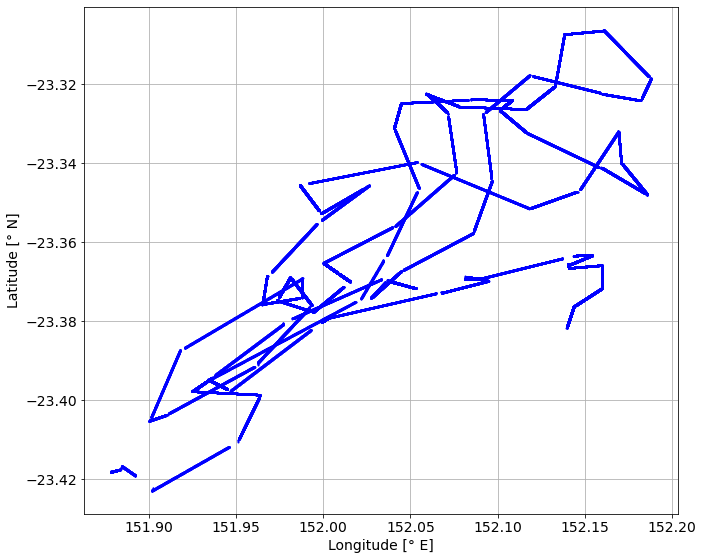

In [40]:
plt.figure(figsize=(10,8))
plt.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=1,
        label='Glider data', linestyle='None')
plt.xlabel('Longitude [\u00b0 E]')
plt.ylabel('Latitude [\u00b0 N]')
plt.grid()
plt.tight_layout()

Text(0, 0.5, 'Latitude')

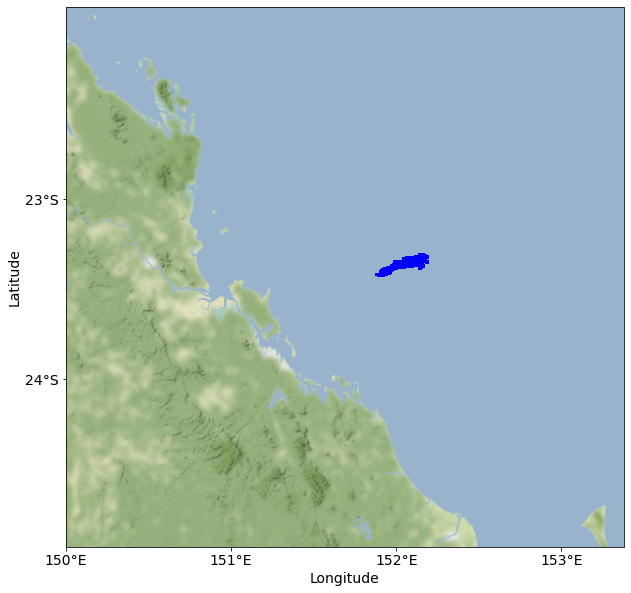

In [57]:
LONG_min = xr.DataArray.min(glider_data.LONGITUDE)
LONG_max = xr.DataArray.min(glider_data.LONGITUDE)
LAT_min = xr.DataArray.min(glider_data.LATITUDE)
LAT_max = xr.DataArray.min(glider_data.LATITUDE)

stamen_terrain = cimgt.Stamen('terrain-background')
fig = plt.figure(figsize=(10, 20))

# Create a GeoAxes in the tile's projection.
#ax1 = fig.add_subplot(1, 2, 1, projection=stamen_terrain.crs)
#ax2 = fig.add_subplot(1, 2, 2, projection=stamen_terrain.crs)

ax1 = plt.axes(projection=stamen_terrain.crs)  # standard axes
ax1.set_extent([LONG_min-1.5,LONG_max+1.5, LAT_min-1.5, LAT_max+1.5], crs=ccrs.PlateCarree())
ax1.add_image(stamen_terrain, 8)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xticks([150,151,152,153], crs=ccrs.PlateCarree())
ax1.set_yticks([-24, -23,], crs=ccrs.PlateCarree())
plt.rcParams.update({'font.size': 14})
ax1.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=1,
        transform=ccrs.PlateCarree(),label='Glider data', linestyle='None')

plt.tight_layout
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

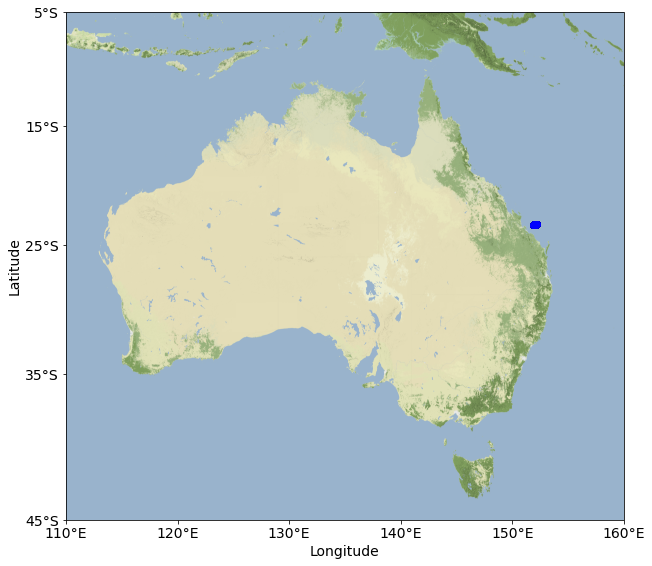

In [58]:
fig = plt.figure(figsize=(10, 20))

# Create a GeoAxes in the tile's projection.
#ax1 = fig.add_subplot(1, 2, 1, projection=stamen_terrain.crs)
#ax2 = fig.add_subplot(1, 2, 2, projection=stamen_terrain.crs)

ax1 = plt.axes(projection=stamen_terrain.crs)  # standard axes
ax1.set_extent([LONG_min-1.5,LONG_max+1.5, LAT_min-1.5, LAT_max+1.5], crs=ccrs.PlateCarree())
ax1.add_image(stamen_terrain, 8)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xticks([110,120,130, 140, 150, 160], crs=ccrs.PlateCarree())
ax1.set_yticks([-45,-35,-25,-15,-5], crs=ccrs.PlateCarree())
plt.rcParams.update({'font.size': 14})
ax1.plot(glider_data.LONGITUDE,glider_data.LATITUDE,marker='o',color='b',markersize=5,
        transform=ccrs.PlateCarree(),label='Glider data', linestyle='None')

plt.tight_layout
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Create T-S diagram

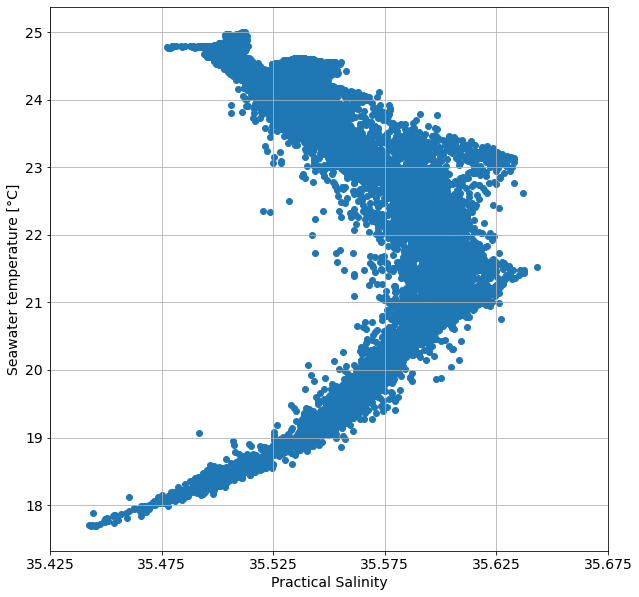

In [59]:
# create figure with specific size
plt.figure(figsize=(10,10))
# scatter TEMP vs. PSAL
plt.scatter(PSAL_QC_TS,TEMP_QC_TS)
# add axis labels
plt.xlabel('Practical Salinity')
plt.ylabel('Seawater temperature [\u00b0C]')
# reduce number of ticks
locs, labels = plt.xticks()
plt.tight_layout
plt.xticks(locs[::2])
plt.grid()

### Create timeseries plot

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


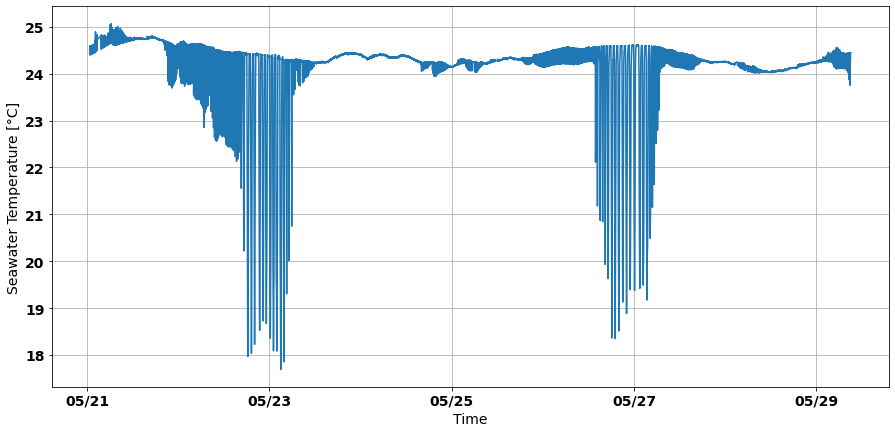

In [64]:
# define plot font family, weight, and size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

# create figure with set size
plt.figure(figsize=(15,7))
# plot TEMP  timeseries
plt.plot(TEMP_TIME_QC,TEMP_QC)
# create axis labels
plt.xlabel('Time')
plt.ylabel('Seawater Temperature [\u00b0C]')
# set font that was defined above
plt.rc('font', **font)
# get locations and labels of x-axis ticks
locs, labels = plt.xticks()
# change the frequency of the xtick to every 2nd element in previous tick array (locs)
plt.xticks(locs[::2])
# change time python number to date string
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# add a grid
plt.grid(True)

### Create transect plot of TEMP, PSAL, and CHL

Text(0, 0.5, 'Chlorophyll fluorescence [mg$^{-3}$]')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


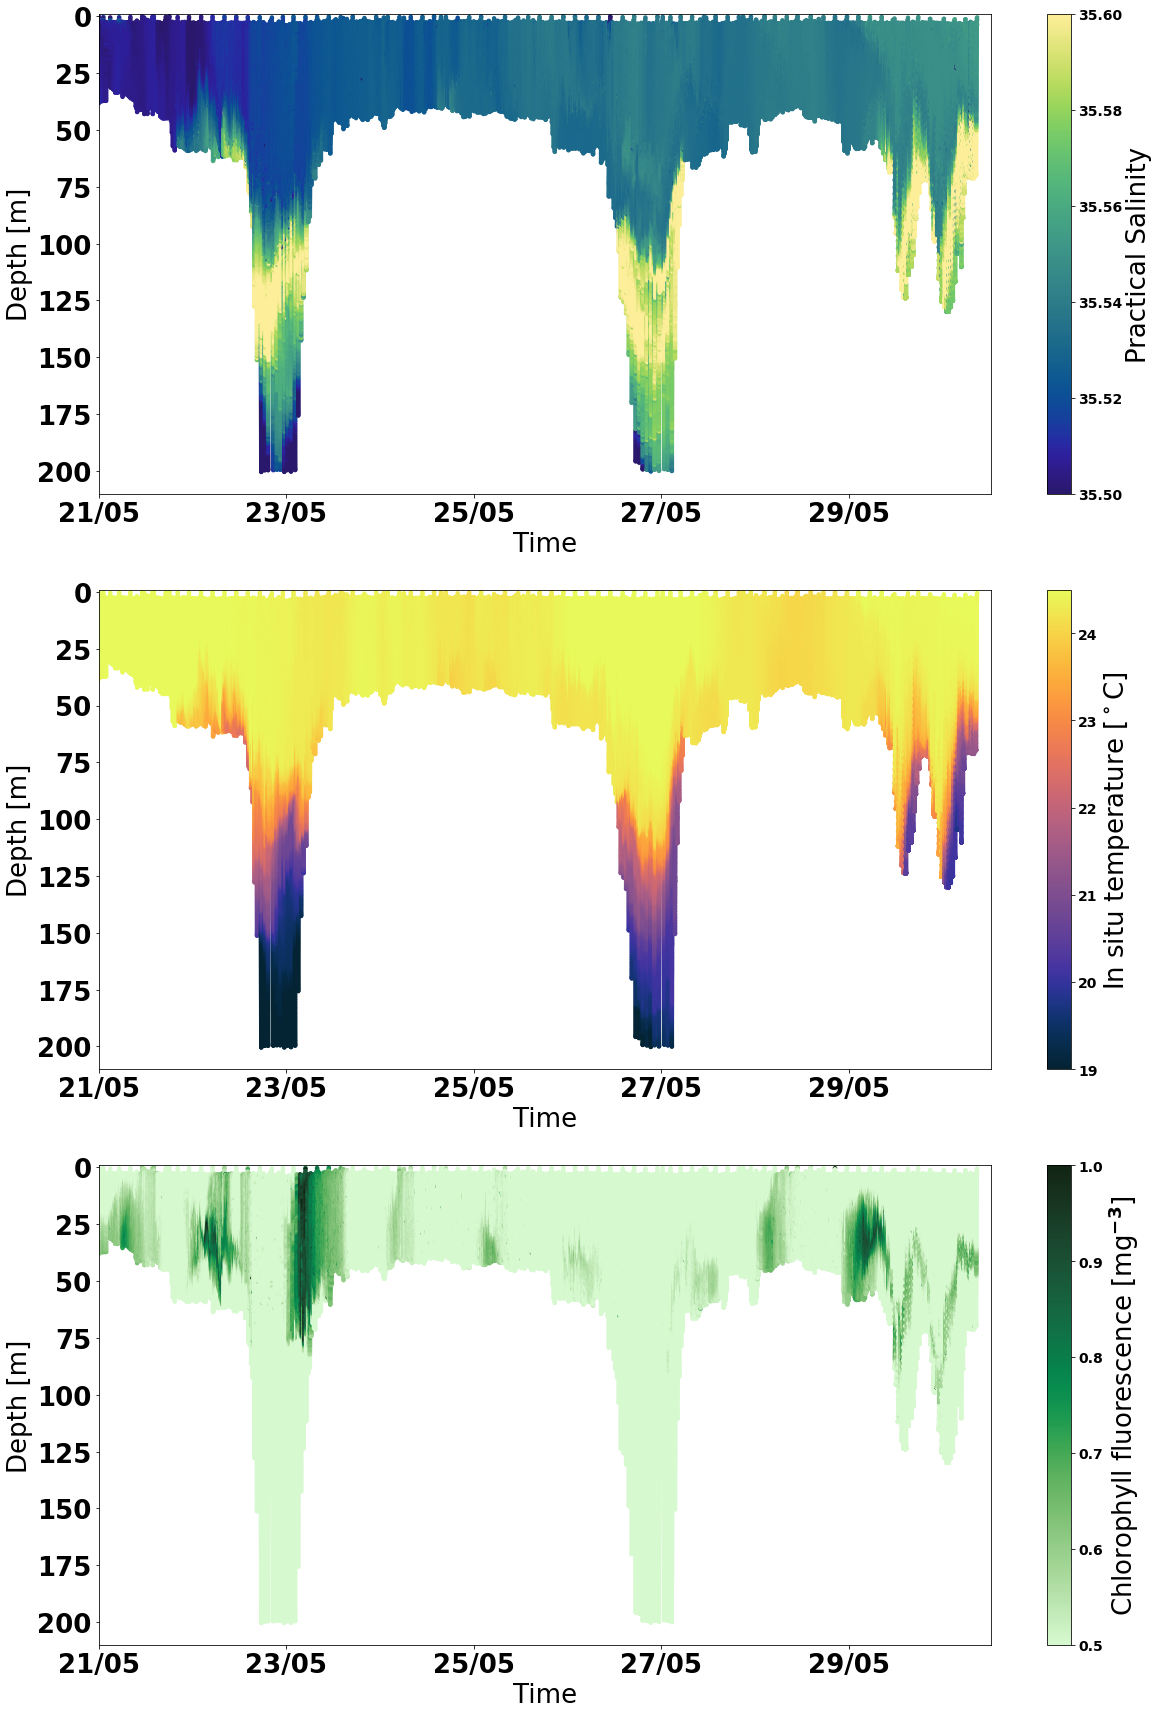

In [65]:
##############
# PSAL
##############

# create figure with specific size and 3 horizontal subplots
fig, ax = plt.subplots(3,1,figsize=(20,30))
# set subplot colormap using cmocean library of perceptually uniformap color maps
cmap_haline = cmocean.cm.haline
# define scatter settings here
shortcut = dict(s=20, c=glider_data_frame['PSAL'], 
                marker='o', edgecolor='none',cmap=cmap_haline,
                vmin=35.5,vmax=35.6)
# scatter time vs depth colored by PSAL
cs1 = ax[0].scatter(glider_data_frame.index, glider_data_frame['DEPTH'], **shortcut)
# flip y-axis 
ax[0].invert_yaxis()
# set subplot labels
ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Time')
# set subplot axis limits
ax[0].set_xlim(glider_data_frame.index[0], glider_data_frame.index[-1])
ax[0].set_ylim(210, -1)
# reduce frequency of Xticks to reduce text overlap
start, end = ax[0].get_xlim()
# every 2nd tick between start and end ticks
ax[0].xaxis.set_ticks(np.arange(start, end, 2))
# display date string rather than number
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# change fontsize to size 26
for item in ([ax[0].title, ax[0].xaxis.label, ax[0].yaxis.label] +
              ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    item.set_fontsize(26)
# create corresponding colorbar and label
cbar = plt.colorbar(cs1,orientation='vertical',ax=ax[0])
cbar.ax.set_ylabel('Practical Salinity',fontsize=26)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

##############
# TEMP
##############

# set subplot colormap using cmocean library of perceptually uniformap color maps
cmap_thermal = cmocean.cm.thermal
# define scatter settings here
shortcut = dict(s=20, c=glider_data_frame['TEMP'], 
                marker='o', edgecolor='none',cmap=cmap_thermal,
                vmin=19,vmax=24.5)
# scatter time vs depth colored by PSAL
cs2 = ax[1].scatter(glider_data_frame.index, glider_data_frame['DEPTH'], **shortcut)
# flip y-axis 
ax[1].invert_yaxis()
# set subplot labels
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time')
# set subplot axis limits
ax[1].set_xlim(glider_data_frame.index[1], glider_data_frame.index[-1])
ax[1].set_ylim(210, -1)
# reduce frequency of Xticks to reduce text overlap
start, end = ax[1].get_xlim()
# every 2nd tick between start and end ticks
ax[1].xaxis.set_ticks(np.arange(start, end, 2))
# display date string rather than number
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# change fontsize to size 26
for item in ([ax[1].title, ax[1].xaxis.label, ax[1].yaxis.label] +
              ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    item.set_fontsize(26)
# create corresponding colorbar and label
cbar = plt.colorbar(cs2,orientation='vertical',ax=ax[1])
cbar.ax.set_ylabel('In situ temperature [$^\circ$C]',fontsize=26)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

##############
# CHL
##############

# set subplot colormap using cmocean library of perceptually uniformap color maps
cmap_algae = cmocean.cm.algae
# define scatter settings here
shortcut = dict(s=20, c=glider_data_frame['CPHL'], 
                marker='o', edgecolor='none',cmap=cmap_algae,
                vmin=0.5,vmax=1)
# scatter time vs depth colored by PSAL
cs2 = ax[2].scatter(glider_data_frame.index, glider_data_frame['DEPTH'], **shortcut)
# flip y-axis 
ax[2].invert_yaxis()
# set subplot labels
ax[2].set_ylabel('Depth [m]')
ax[2].set_xlabel('Time')
# set subplot axis limits
ax[2].set_xlim(glider_data_frame.index[1], glider_data_frame.index[-1])
ax[2].set_ylim(210, -1)
# reduce frequency of Xticks to reduce text overlap
start, end = ax[2].get_xlim()
# every 2nd tick between start and end ticks
ax[2].xaxis.set_ticks(np.arange(start, end, 2))
# display date string rather than number
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# change fontsize to size 26
for item in ([ax[2].title, ax[2].xaxis.label, ax[2].yaxis.label] +
              ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    item.set_fontsize(26)
# create corresponding colorbar and label
cbar = plt.colorbar(cs2,orientation='vertical',ax=ax[2])
cbar.ax.set_ylabel('Chlorophyll fluorescence [mg$^{-3}$]',fontsize=26)

### Save plot as PNG

In [67]:
fig.savefig('TEMP_PSAL_CHL_Heron.png', bbox_inches='tight')

# <font color=#3498DB> Save modified data as netCDF file

In [72]:
mean_TEMP = glider_data.TEMP.mean(dim='TIME')

In [73]:
mean_TEMP

<xarray.DataArray 'TEMP' ()>
array(24.03187545)

In [74]:
new_filename = 'mean_TEMP.nc'
mean_TEMP.to_netcdf(path=new_filename)

### load in newly created 'mean_TEMP' file to test

In [75]:
test = xr.open_dataset(new_filename)

In [76]:
test.TEMP

<xarray.DataArray 'TEMP' ()>
array(24.031875)